In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [2]:
nikkei = pd.read_csv(r"C:\Users\mdtan\^N225.csv")
nikkei.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-27,21504.609375,21578.810547,21492.650391,21556.509766,21556.509766,67700000
1,2019-02-28,21536.550781,21536.550781,21364.089844,21385.160156,21385.160156,71500000
2,2019-03-01,21490.019531,21641.580078,21490.019531,21602.689453,21602.689453,62600000
3,2019-03-04,21812.810547,21860.390625,21740.919922,21822.039063,21822.039063,59100000
4,2019-03-05,21712.800781,21798.380859,21659.039063,21726.279297,21726.279297,59200000


In [3]:
nikkei.shape

(1217, 7)

In [4]:
nikkei.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
nikkei.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1.217000e+03
mean,26719.432149,26860.126820,26570.410622,26723.108537,26723.108537,7.625653e+07
std,4094.369970,4116.468288,4084.485640,4099.441715,4099.441715,2.412754e+07
min,16570.570313,17049.029297,16358.190430,16552.830078,16552.830078,0.000000e+00
25%,23189.480469,23320.710938,23102.609375,23204.759766,23204.759766,6.040000e+07
50%,27369.660156,27486.419922,27255.580078,27402.050781,27402.050781,7.190000e+07
75%,29033.919922,29150.800781,28870.250000,29018.330078,29018.330078,8.660000e+07
max,39320.640625,39388.078125,39181.031250,39233.710938,39233.710938,2.334000e+08


In [6]:
nikkei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1217 non-null   object 
 1   Open       1217 non-null   float64
 2   High       1217 non-null   float64
 3   Low        1217 non-null   float64
 4   Close      1217 non-null   float64
 5   Adj Close  1217 non-null   float64
 6   Volume     1217 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 66.7+ KB


In [29]:
if 'Date' in nikkei.columns:
    nikkei['Date'] = pd.to_datetime(nikkei['Date'])

In [7]:
layout = go.Layout(
    title='STOCK PRICE OF NIKKEI',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
nikkei_data = [{'x':nikkei['Date'], 'y':nikkei['Close']}]
plot = go.Figure(data=nikkei_data, layout=layout)

In [8]:
iplot(plot)

In [9]:
nikkei["Open-Close"] = nikkei.Close - nikkei.Open
nikkei["High-Low"] = nikkei.High - nikkei.Low
nikkei = nikkei.dropna()
X = nikkei[["Open-Close", "High-Low"]]
X.head()

,Open-Close,High-Low
0,51.900391,86.160156
1,-151.390625,172.460937
2,112.669922,151.560547
3,9.228516,119.470703
4,13.478516,139.341796


In [10]:
Y = np.where(nikkei["Close"].shift(-1) > nikkei["Close"], 1,-1)

In [11]:
split_percentage = 0.8
split = int(split_percentage * len(nikkei))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [12]:
scores= []
for num_trees in range(1, 41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, Y, cv = 10))

In [13]:
print(scores[0])

[0.45081967 0.54098361 0.58196721 0.54098361 0.42622951 0.54918033
 0.54098361 0.48760331 0.53719008 0.52892562]


In [14]:
print(scores[1])

[0.40163934 0.41803279 0.42622951 0.49180328 0.48360656 0.49180328
 0.53278689 0.54545455 0.50413223 0.47107438]


In [15]:
print(scores[2])

[0.47540984 0.42622951 0.45081967 0.53278689 0.55737705 0.45081967
 0.54098361 0.48760331 0.58677686 0.47933884]


In [16]:
rfc = RandomForestClassifier(n_estimators = 16)

In [17]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.46      0.50      0.48       104
           1       0.60      0.56      0.58       140

    accuracy                           0.54       244
   macro avg       0.53      0.53      0.53       244
weighted avg       0.54      0.54      0.54       244



In [20]:
print(confusion_matrix(Y_test, rfc_pred))

[[52 52]
 [61 79]]


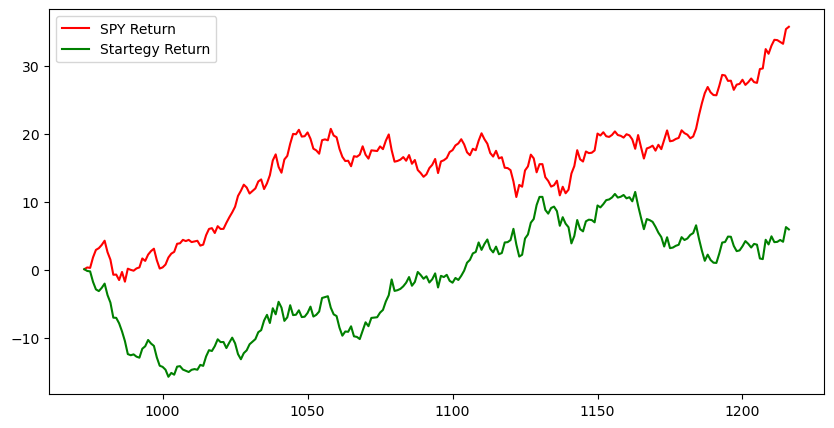

In [21]:
nikkei["predicted_signal"] = rfc.predict(X)
nikkei["spy_return"] = np.log(nikkei["Close"]/nikkei["Close"].shift(1))
cumulative_spy_return = nikkei[split:]["spy_return"].cumsum() * 100

nikkei["startegy_return"] = nikkei["spy_return"] * nikkei["predicted_signal"].shift(1)
cumulative_startegy_return = nikkei[split:]["startegy_return"].cumsum() * 100

plt.figure(figsize= (10, 5))
plt.plot(cumulative_spy_return, color= "r", label = "SPY Return")
plt.plot(cumulative_startegy_return, color = "g", label = "Startegy Return")
plt.legend()
plt.show()

In [22]:
Std = cumulative_startegy_return.std()
Sharpe = (cumulative_startegy_return - cumulative_spy_return) / Std
Sharpe = Sharpe.mean()
print("Ratio: %0.2f"%Sharpe)

Ratio: -2.23


In [23]:
model = rfc.fit(X_train, Y_train)


In [24]:
probability = model.predict_proba(X_test)
print(probability)

[[0.8125 0.1875]
 [0.5625 0.4375]
 [0.3125 0.6875]
 [0.5    0.5   ]
 [0.625  0.375 ]
 [0.5    0.5   ]
 [0.125  0.875 ]
 [0.4375 0.5625]
 [0.375  0.625 ]
 [0.4375 0.5625]
 [0.9375 0.0625]
 [0.5    0.5   ]
 [0.375  0.625 ]
 [0.4375 0.5625]
 [0.1875 0.8125]
 [0.5625 0.4375]
 [0.6875 0.3125]
 [0.8125 0.1875]
 [0.4375 0.5625]
 [0.4375 0.5625]
 [0.625  0.375 ]
 [0.1875 0.8125]
 [0.75   0.25  ]
 [0.6875 0.3125]
 [0.25   0.75  ]
 [0.375  0.625 ]
 [0.75   0.25  ]
 [0.625  0.375 ]
 [0.6875 0.3125]
 [0.1875 0.8125]
 [0.3125 0.6875]
 [0.     1.    ]
 [0.5625 0.4375]
 [0.625  0.375 ]
 [0.5625 0.4375]
 [0.6875 0.3125]
 [0.75   0.25  ]
 [0.375  0.625 ]
 [0.625  0.375 ]
 [0.8125 0.1875]
 [0.1875 0.8125]
 [0.375  0.625 ]
 [0.1875 0.8125]
 [0.625  0.375 ]
 [0.1875 0.8125]
 [0.1875 0.8125]
 [0.1875 0.8125]
 [0.625  0.375 ]
 [0.625  0.375 ]
 [0.5625 0.4375]
 [0.5    0.5   ]
 [0.6875 0.3125]
 [0.5625 0.4375]
 [0.375  0.625 ]
 [0.1875 0.8125]
 [0.4375 0.5625]
 [0.875  0.125 ]
 [0.125  0.875 ]
 [0.3125 0.687

In [25]:
predicted = rfc.predict(X_test)

In [26]:
print(metrics.confusion_matrix(Y_test, predicted))

[[49 55]
 [63 77]]


In [27]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.44      0.47      0.45       104
           1       0.58      0.55      0.57       140

    accuracy                           0.52       244
   macro avg       0.51      0.51      0.51       244
weighted avg       0.52      0.52      0.52       244



In [28]:
print(model.score(X_train, Y_train))

0.9917780061664954
